# 随机变量及其分布

随机变量是对一次试验结果的量化。一个表示抛硬币结果的随机变量可以表示成X = {1 如果正面朝上,     2 如果反面朝上}

随机变量是一个变量，它取值于一组可能的值（离散或连续的），并服从某种随机性。随机变量的每个可能取值的都与一个概率相关联。随机变量的所有可能取值和与之相关联的概率就被称为概率分布（probability distributrion）。


概率分布有两种类型：离散（discrete）概率分布和连续（continuous）概率分布。

离散概率分布的例子有伯努利分布（Bernoulli distribution）、二项分布（binomial distribution）、泊松分布（Poisson distribution）和几何分布（geometric distribution）

连续概率分布也称为概率密度函数（probability density function），它们是具有连续取值（例如一条实线上的值）的函数。正态分布（normal distribution）、指数分布（exponential distribution）和β分布（beta distribution）等都属于连续概率分布。


## Python中的统计包


Python有一个很好的统计,就是scipy里面的stats。 https://docs.scipy.org/doc/scipy/reference/stats.html

Scipy的stats模块包含了多种概率分布的随机变量,分为连续的和离散的两种。

所有的连续随机变量都是rv_continuous的派生类的子类，而所有的离散随机变量都是 rv_discrete的派生类的子类。

基本上每个类都有以下几个方法：

rvs：用来生成随机变量

pmf：概率密度函数

cdf：累积分布函数

median：中位数

mean：均值

var：方差

std：标准差

#### 绘制分布曲线（概率密度和累计分布）


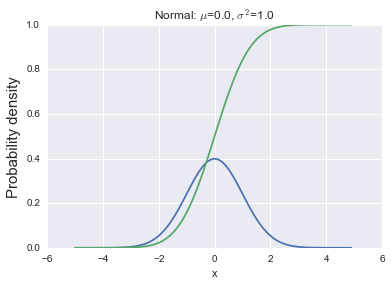

In [6]:
''''' 
正态分布是一种连续分布，其函数可以在实线上的任何地方取值。 
正态分布由两个参数描述：分布的平均值μ和方差σ2 。 
'''  
mu = 0#mean  
sigma = 1#standard deviation  
x = np.arange(-5,5,0.1)  
y = stats.norm.pdf(x,0,1)  
cy = stats.norm.cdf(x,0,1)
# print y  
plt.plot(x, y,label='pdf')
plt.plot(x, cy,label='cdf')
plt.title('Normal: $\mu$=%.1f, $\sigma^2$=%.1f' % (mu,sigma))  
plt.xlabel('x')  
plt.ylabel('Probability density', fontsize=15)  
plt.show()

[  2.00000000e+001   2.70670566e+000   3.66312778e-001   4.95750435e-002
   6.70925256e-003   9.07998595e-004   1.22884247e-004   1.66305744e-005
   2.25070349e-006   3.04599595e-007   4.12230724e-008   5.57893619e-009
   7.55026909e-010   1.02181781e-010   1.38288002e-011   1.87152459e-012
   2.53283311e-013   3.42781686e-014   4.63904566e-015   6.27826558e-016
   8.49670851e-017   1.14990445e-017   1.55622645e-018   2.10612347e-019
   2.85032817e-020   3.85749970e-021   5.22055814e-022   7.06525714e-023
   9.56178577e-024   1.29404699e-024   1.75130215e-025   2.37012973e-026
   3.20762178e-027   4.34104402e-028   5.87496422e-029   7.95089947e-030
   1.07603723e-030   1.45625804e-031   1.97083094e-032   2.66722963e-033
   3.60970278e-034   4.88520148e-035   6.61140125e-036   8.94755861e-037
   1.21092038e-037   1.63880252e-038   2.21787804e-039   3.00157153e-040
   4.06218533e-041   5.49757002e-042   7.44015195e-043   1.00691507e-043
   1.36271136e-044   1.84422928e-045   2.49589293e-

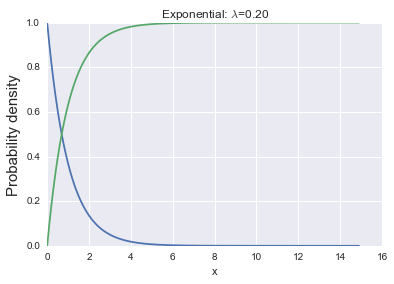

In [13]:
''''' 
指数分布是一种连续概率分布，用于表示独立随机事件发生的时间间隔。 
比如旅客进入机场的时间间隔、打进客服中心电话的时间间隔等等。 
'''  
lambd = 20 #  
x = np.arange(0,15,0.1)  
 
py = stats.expon.pdf(x)
cy = stats.expon.cdf(x)
print y  
plt.plot(x, py,label='pdf')  
plt.plot(x,cy,label='cdf')
plt.title('Exponential: $\lambda$=%.2f' % (lambd))  
plt.xlabel('x')  
plt.ylabel('Probability density', fontsize=15)  
plt.show()  

## 1.离散概率分布

### 1.1 二项分布（Binomial Distribution）

E(X) = np,Var(X) = np(1−p)

In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### a.模拟二项分布

抛10次硬币，恰好两次正面朝上的概率是多少？

假设在该试验中正面朝上的概率为0.5，这意味着平均来说，我们可以期待有5次是硬币正面朝上的。但实际结果可能是0次正面朝上、1次正面朝上，一直到10次正面朝上，一共有11中可能结果。

定义掷硬币的所有可能结果为k = np.arange(0,11)：用stats.binom.pmf计算每次观测的概率质量函数。它返回一个含有11个元素的列表（list），这些元素表示与每个观测相关联的概率值。


[ 0.00097656  0.00976563  0.04394531  0.1171875   0.20507813  0.24609375
  0.20507813  0.1171875   0.04394531  0.00976563  0.00097656]
1.0
0.0439453125


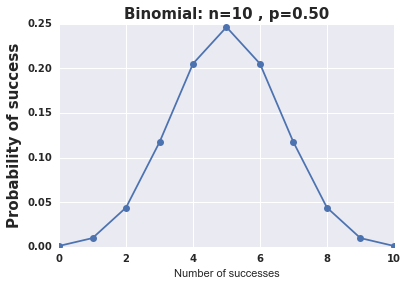

In [11]:
def binom_pmf():  
    ''''' 
    二项分布的例子：抛掷10次硬币，恰好两次正面朝上的概率是多少？ 
    '''  
    n = 10#独立实验次数  
    p = 0.5#每次正面朝上概率  
    k = np.arange(0,11)#0-10次正面朝上概率  
    binomial = stats.binom.pmf(k,n,p)  
    print binomial#概率和为1  
    print sum(binomial)  
    print binomial[2]  
  
    plt.plot(k, binomial,'o-')  
    plt.title('Binomial: n=%i , p=%.2f' % (n,p),fontsize=15)  
    plt.xlabel('Number of successes')  
    plt.ylabel('Probability of success',fontsize=15)  
    plt.show()  

binom_pmf()

#### b.生成服从二项分布的随机数

用.rvs函数模拟一个二项随机变量，其中参数size指定你要进行模拟的次数。

我让Python返回10000个参数为n和p的二项式随机变量。我将输出这些随机变量的平均值和标准差，然后画出所有的随机变量的直方图。

10000
mean: 3.0096
SD: 1.44572


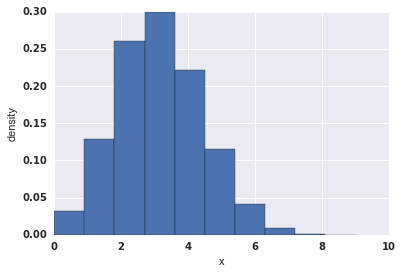

In [13]:
def binom_rvs():  
    ''''' 
    用.rvs函数模拟一个二项随机变量，其中参数size指定你要进行模拟的次数。
    size=10000即生成10000个参数为n和p的二项式随机变量
    相当于进行10000次实验，每次抛10次硬币，统计有几次正面朝上，最后统计每次实验正面朝上的次数 
    '''  
    binom_sim = data = stats.binom.rvs(n=10,p=0.3,size=10000)  
    print len(binom_sim)  
    print "mean: %g" % np.mean(binom_sim)  
    print "SD: %g" % np.std(binom_sim,ddof=1)  
  
    plt.hist(binom_sim,bins=10,normed=True)  
    plt.xlabel('x')  
    plt.ylabel('density')  
    plt.show()  
binom_rvs()

### 1.2 泊松分布

 

一个服从泊松分布的随机变量X，表示在具有比率参数（rate parameter）λ的一段固定时间间隔内，事件发生的次数。参数λ告诉你该事件发生的比率。随机变量X的平均值和方差都是λ


#### a.模拟珀松分布

考虑一个平均每天发生2起事故的例子。泊松分布的实现和二项分布有些类似，在泊松分布中我们需要指定比率参数。泊松分布的输出是一个数列，包含了发生0次、1次、2次，直到10次事故的概率。

[  1.35335283e-01   2.70670566e-01   2.70670566e-01   1.80447044e-01
   9.02235222e-02   3.60894089e-02   1.20298030e-02   3.43708656e-03
   8.59271640e-04   1.90949253e-04]


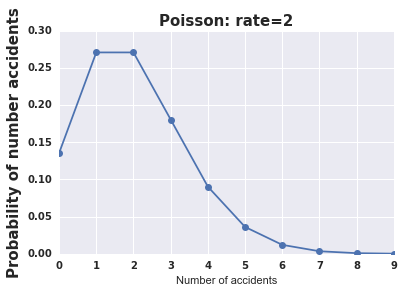

In [14]:
def poisson_pmf():  
    ''''' 
    泊松分布的例子：已知某路口发生事故的比率是每天2次，那么在此处一天内发生4次事故的概率是多少？ 
    泊松分布的输出是一个数列，包含了发生0次、1次、2次，直到10次事故的概率。 
    '''  
    rate = 2  
    n = np.arange(0,10)  
    y = stats.poisson.pmf(n,rate)  
    print y  
    plt.plot(n, y, 'o-')  
    plt.title('Poisson: rate=%i' % (rate), fontsize=15)  
    plt.xlabel('Number of accidents')  
    plt.ylabel('Probability of number accidents', fontsize=15)  
    plt.show()  


poisson_pmf()

#### b.生成服从泊松分布的随机数

mean: 1.989
SD: 1.39313


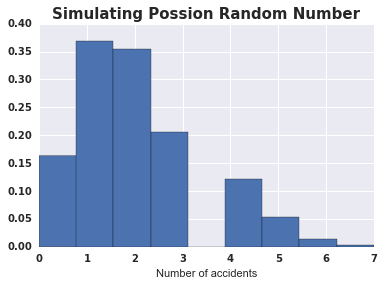

In [21]:
def poisson_rvs():  
    ''''' 
    模拟1000个服从泊松分布的随机变量 
    '''  
    data = stats.poisson.rvs(mu=2, loc=0, size=1000)  
    print "mean: %g" % np.mean(data)  
    print "SD: %g" % np.std(data, ddof=1)  
  
 
    plt.hist(data,bins=9,normed=True)  
    plt.title('Simulating Possion Random Number', fontsize=15)  
    plt.xlabel('Number of accidents')  
 
    plt.show()  

poisson_rvs()    

## 2. 连续型变量的分布

#### 2.1 正态分布


正态分布由两个参数描述：分布的平均值μ和方差σ2 

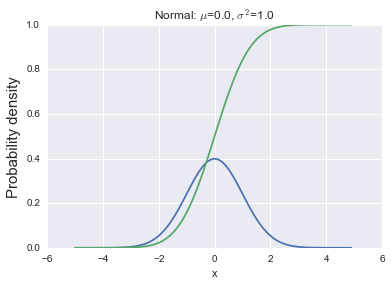

In [16]:
def norm_pmf():  
    ''''' 
    正态分布是一种连续分布，其函数可以在实线上的任何地方取值。 
    正态分布由两个参数描述：分布的平均值μ和方差σ2 。 
    '''  
    mu = 0#mean  
    sigma = 1#standard deviation  
    x = np.arange(-5,5,0.1)  
    y = stats.norm.pdf(x,0,1)  
    cy = stats.norm.cdf(x,0,1)
#     print y  
    plt.plot(x, y,label='pdf')
    plt.plot(x,cy,label='cdf')
    plt.title('Normal: $\mu$=%.1f, $\sigma^2$=%.1f' % (mu,sigma))  
    plt.xlabel('x')  
    plt.ylabel('Probability density', fontsize=15)  
    plt.show()
    
norm_pmf()

#### 2.2 beta 分布

β分布是一个取值在 [0, 1] 之间的连续分布，它由两个形态参数α和β的取值所刻画。

β分布的形状取决于α和β的值。贝叶斯分析中大量使用了β分布。

[ 0.49361898  0.50328868  0.51294259  0.5225726   0.5321705   0.54172794
  0.55123649  0.56068762  0.57007272  0.57938311  0.58861006  0.59774481
  0.60677857  0.61570252  0.62450787  0.63318582  0.64172761  0.65012453
  0.65836792  0.66644921  0.67435989  0.68209158  0.689636    0.69698503
  0.70413065  0.71106506  0.71778058  0.72426976  0.73052535  0.73654028
  0.74230776  0.74782121  0.75307432  0.75806105  0.76277563  0.76721258
  0.77136674  0.77523323  0.77880752  0.78208539  0.78506297  0.78773672
  0.79010348  0.79216042  0.79390509  0.79533541  0.79644966  0.79724651
  0.797725    0.79788456  0.797725    0.79724651  0.79644966  0.79533541
  0.79390509  0.79216042  0.79010348  0.78773672  0.78506297  0.78208539
  0.77880752  0.77523323  0.77136674  0.76721258  0.76277563  0.75806105
  0.75307432  0.74782121  0.74230776  0.73654028  0.73052535  0.72426976
  0.71778058  0.71106506  0.70413065  0.69698503  0.689636    0.68209158
  0.67435989  0.66644921  0.65836792  0.65012453  0

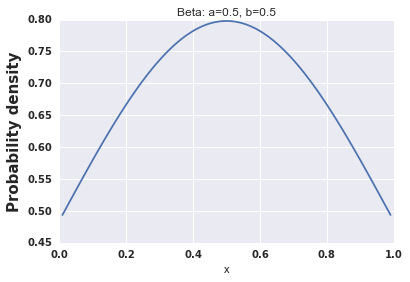

In [24]:
def beta_pmf():  
    ''''' 
    β分布是一个取值在 [0, 1] 之间的连续分布，它由两个形态参数α和β的取值所刻画。 
    β分布的形状取决于α和β的值。贝叶斯分析中大量使用了β分布。 
    '''  
    a = 0.5#  
    b = 0.5  
    x = np.arange(0.01,1,0.01)  
    y = stats.norm.pdf(x,a,b)  
    print y  
    plt.plot(x, y)  
    plt.title('Beta: a=%.1f, b=%.1f' % (a,b))  
    plt.xlabel('x')  
    plt.ylabel('Probability density', fontsize=15)  

beta_pmf()

#### 2.3 指数分布


[  5.00000000e-01   4.75614712e-01   4.52418709e-01   4.30353988e-01
   4.09365377e-01   3.89400392e-01   3.70409110e-01   3.52344045e-01
   3.35160023e-01   3.18814076e-01   3.03265330e-01   2.88474905e-01
   2.74405818e-01   2.61022888e-01   2.48292652e-01   2.36183276e-01
   2.24664482e-01   2.13707466e-01   2.03284830e-01   1.93370512e-01
   1.83939721e-01   1.74968875e-01   1.66435542e-01   1.58318385e-01
   1.50597106e-01   1.43252398e-01   1.36265897e-01   1.29620130e-01
   1.23298482e-01   1.17285144e-01   1.11565080e-01   1.06123987e-01
   1.00948259e-01   9.60249543e-02   9.13417620e-02   8.68869717e-02
   8.26494441e-02   7.86185832e-02   7.47843096e-02   7.11370358e-02
   6.76676416e-02   6.43674518e-02   6.12282141e-02   5.82420789e-02
   5.54015792e-02   5.26996123e-02   5.01294219e-02   4.76845811e-02
   4.53589766e-02   4.31467932e-02   4.10424993e-02   3.90408330e-02
   3.71367891e-02   3.53256065e-02   3.36027564e-02   3.19639306e-02
   3.04050313e-02   2.89221604e-02

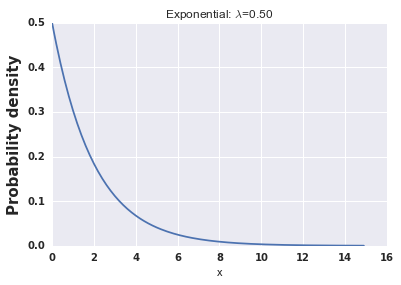

In [28]:
def  exp_pmf():  
    ''''' 
    指数分布是一种连续概率分布，用于表示独立随机事件发生的时间间隔。 
    比如旅客进入机场的时间间隔、打进客服中心电话的时间间隔、中文维基百科新条目出现的时间间隔等等。 
    '''  
    lambd = 0.5#  
    x = np.arange(0,15,0.1)  
    y =lambd * np.exp(-lambd *x)  
    print y  
    plt.plot(x, y)  
    plt.title('Exponential: $\lambda$=%.2f' % (lambd))  
    plt.xlabel('x')  
    plt.ylabel('Probability density', fontsize=15)  
    plt.show()  
  
exp_pmf()

mean: 1.97258
SD: 1.97186


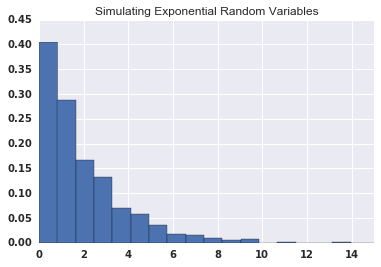

In [26]:
def  expon_rvs():  
    ''''' 
    指数分布下模拟1000个随机变量。scale参数表示λ的倒数。函数np.std中，参数ddof等于标准偏差除以 $n-1$ 的值。 
    '''  
    data = stats.expon.rvs(scale=2, size=1000)  
    print "mean: %g" % np.mean(data)  
    print "SD: %g" % np.std(data, ddof=1)  
  
    plt.hist(data, bins=20, normed=True)  
    plt.xlim(0,15)  
    plt.title('Simulating Exponential Random Variables')  
    plt.show()  
  
expon_rvs()  